In [474]:
# Importing Libs
import os
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation
from collections import Counter # Data Manipulation
import seaborn as sns # Data Viz
import matplotlib.pyplot as plt # Data Viz
from sklearn.impute import SimpleImputer # Perform Imputation
from sklearn.preprocessing import OneHotEncoder # Perform OneHotEnconding
from sklearn.linear_model import LogisticRegression #Modelling
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score # Evaluating the Model

#warnings
import warnings
warnings.filterwarnings("ignore")

In [477]:
dff=pd.read_csv('df_merged_final.csv',index_col=[0])
dff

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,DestinfeelslikeC,DestinheatindexC,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,-21,-14,-21,21,58,85,0.2,-12,10,14
1,2018-01-01,DL,DL_CODESHARE,DL,4579,OO,N8903A,4579,15380,TVC,...,-21,-14,-21,21,58,85,0.2,-12,10,14
2,2018-01-01,DL,DL_CODESHARE,DL,4669,OO,N931EV,4669,15380,TVC,...,-21,-14,-21,21,58,85,0.2,-12,10,14
3,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,...,-21,-14,-21,21,58,85,0.2,-12,10,14
4,2018-01-01,NK,NK,NK,342,NK,N637NK,342,13487,MSP,...,-21,-14,-21,21,58,85,0.2,-12,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715366,2019-01-31,HA,HA_CODESHARE,HA,684,EM,N804HC,684,12173,HNL,...,24,24,23,43,56,79,0.6,25,10,32
715367,2019-01-31,G4,G4,G4,940,G4,234NV,940,14112,PIE,...,-26,-16,-26,34,86,63,0.2,-15,9,20
715368,2019-01-31,UA,UA,UA,174,UA,N36280,174,12016,GUM,...,31,31,27,51,81,81,16.0,28,9,34
715369,2019-01-31,UA,UA,UA,104,UA,N39726,104,12016,GUM,...,31,31,27,51,81,81,16.0,28,9,34


In [478]:
dff.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,DestinfeelslikeC,DestinheatindexC,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph
count,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,...,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000
mean,2667.136314,2666.992938,12729.078274,12728.462852,1327.639232,1333.976279,9.320171,18.356254,1361.171584,1481.070678,...,2.698823,5.396731,2.643331,18.513746,39.098810,65.312077,2.518693,8.802068,9.120859,12.117420
std,1888.088280,1888.123670,1520.989300,1521.355197,480.032456,490.394490,48.216715,11.213320,490.162281,511.568091,...,12.137869,10.027091,12.038080,9.488207,30.505049,19.427564,7.043073,10.366708,1.554050,6.184887
min,1.000000,1.000000,10135.000000,10135.000000,4.000000,1.000000,-330.000000,0.000000,1.000000,1.000000,...,-47.000000,-34.000000,-47.000000,2.000000,0.000000,6.000000,0.000000,-33.000000,0.000000,0.000000
25%,999.000000,999.000000,11292.000000,11292.000000,921.000000,926.000000,-6.000000,11.000000,943.000000,1102.000000,...,-5.000000,-1.000000,-5.000000,11.000000,12.000000,52.000000,0.000000,2.000000,9.000000,8.000000
50%,2153.000000,2153.000000,12892.000000,12892.000000,1320.000000,1330.000000,-3.000000,15.000000,1345.000000,1513.000000,...,3.000000,5.000000,3.000000,17.000000,32.000000,69.000000,0.000000,9.000000,10.000000,11.000000
75%,4319.000000,4319.000000,14082.000000,14092.000000,1730.000000,1736.000000,5.000000,21.000000,1752.000000,1911.000000,...,12.000000,13.000000,12.000000,24.000000,64.000000,81.000000,1.200000,16.000000,10.000000,16.000000
max,9385.000000,9385.000000,16218.000000,16218.000000,2359.000000,2400.000000,1690.000000,181.000000,2400.000000,2400.000000,...,34.000000,34.000000,32.000000,90.000000,100.000000,100.000000,190.500000,40.000000,10.000000,65.000000


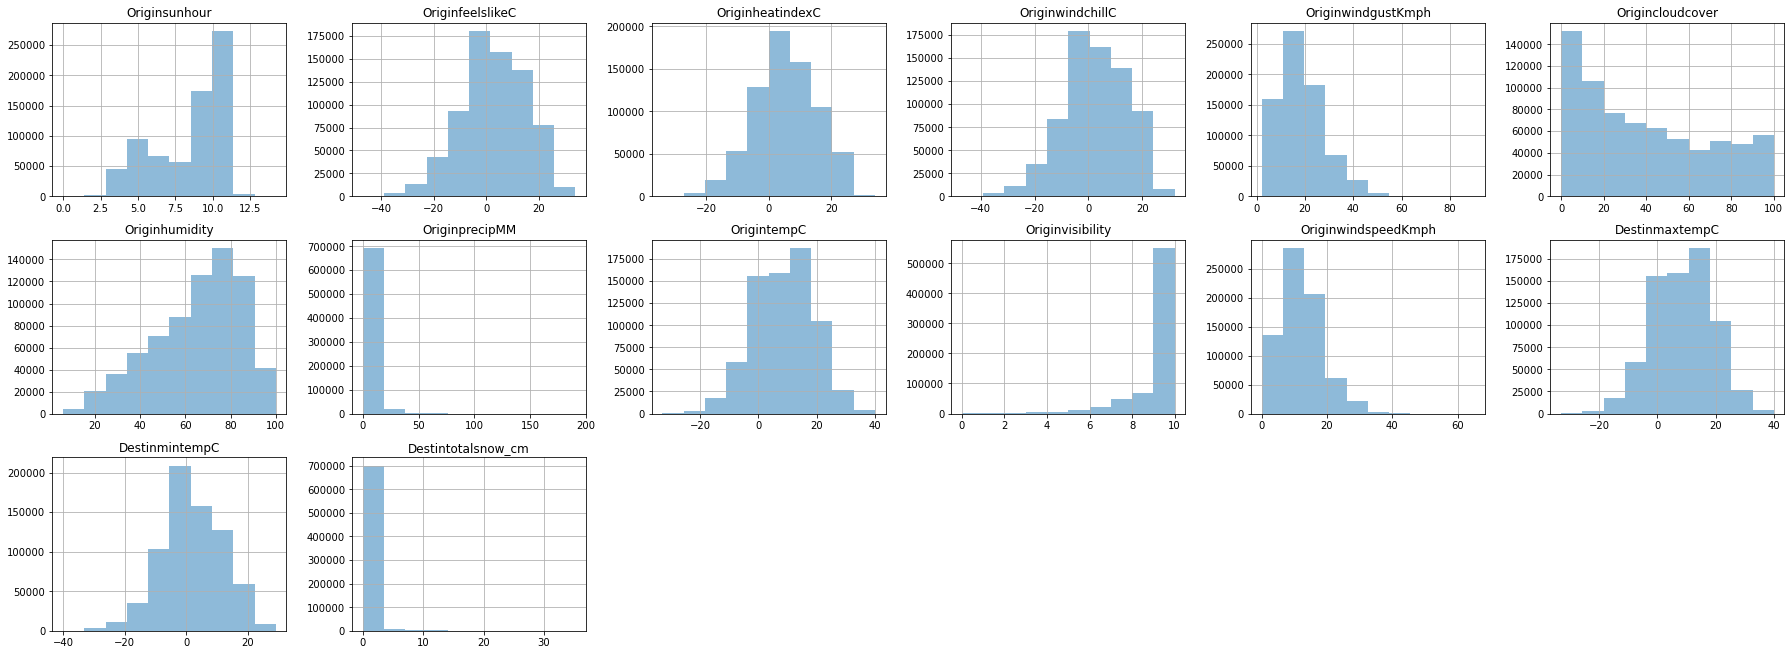

In [479]:
#plot distributions
axes = dff.iloc[:,35:49].hist(layout=(5,6), alpha=0.5, label='x',figsize=(25, 15))
plt.tight_layout()
plt.show()

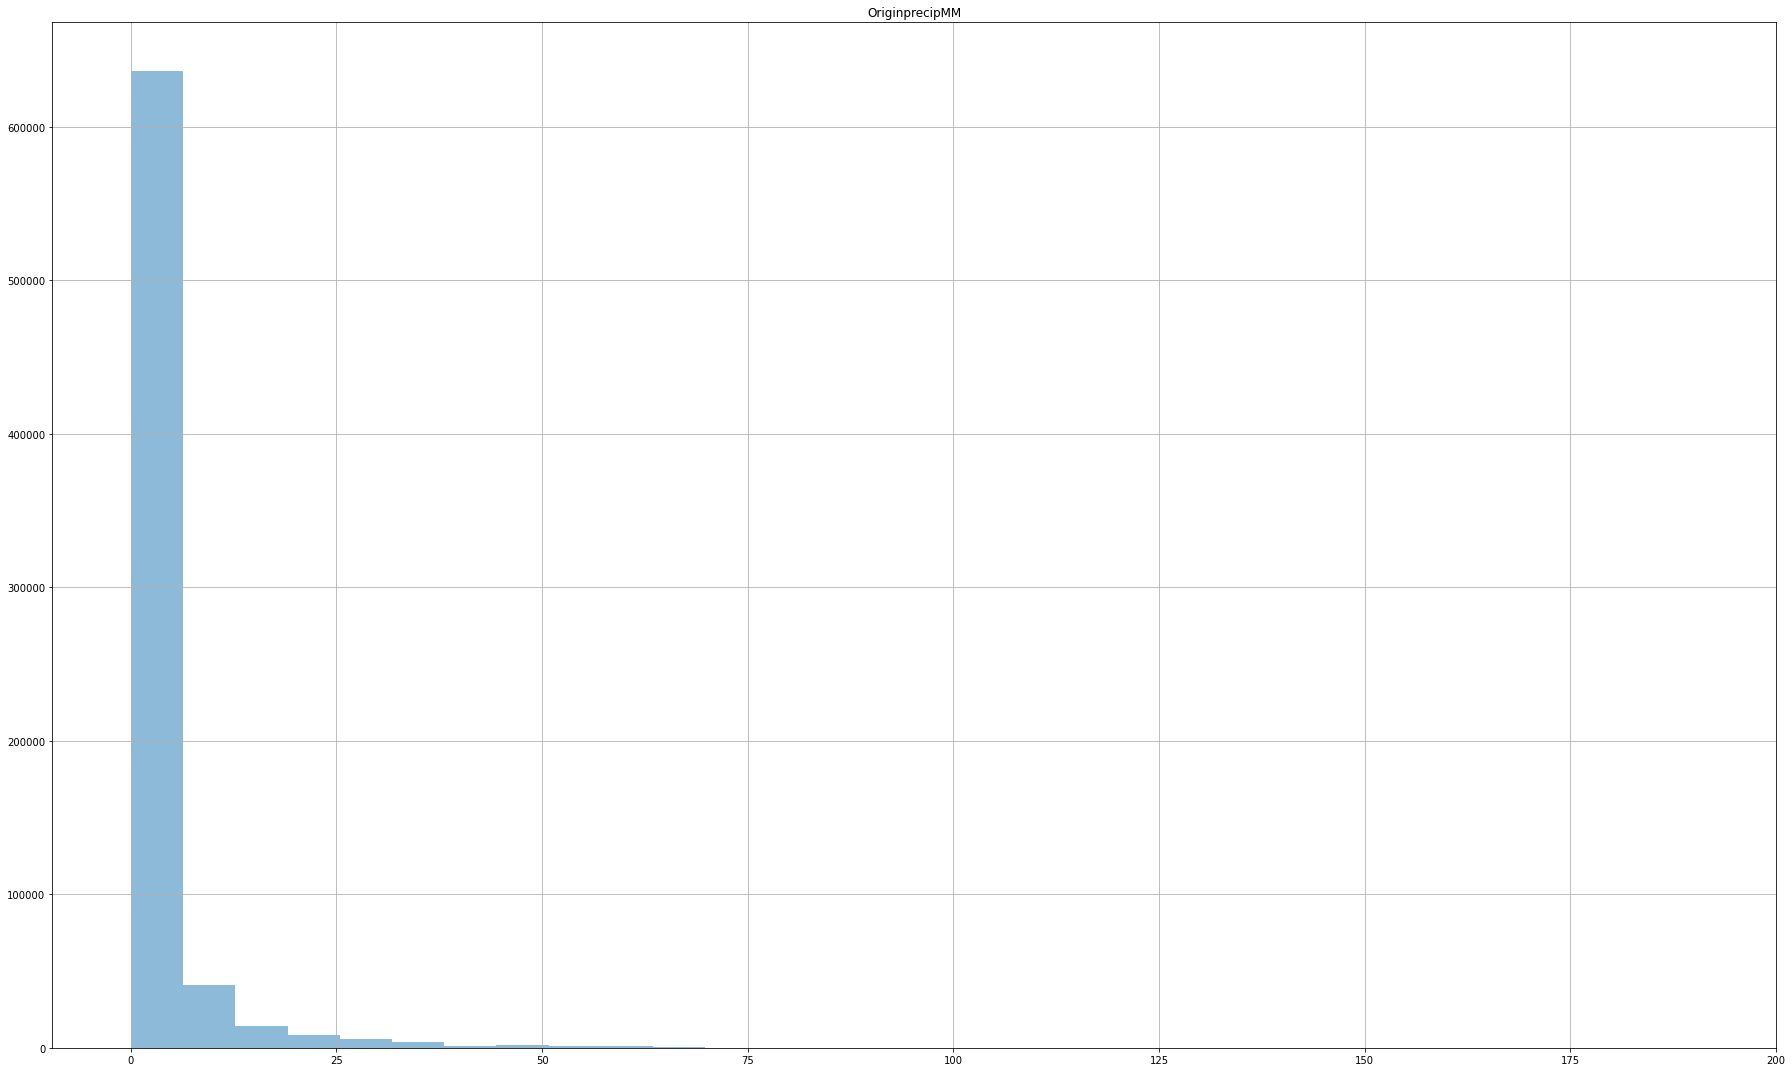

In [481]:
# plot precipitation distribution
axes = dff.iloc[:,42:43].hist(layout=(1,1), alpha=0.5, label='x',figsize=(25, 15), bins=30)
plt.tight_layout()
plt.show()

### Weather Feature Engineering

In [482]:
# encode the weather data at origin
def newlabel_origin(df):
    
    if df['Origincloudcover']<40 and df['OriginprecipMM'] == 0:
        return "clear"
    if df['Origincloudcover']>=40 and df['OriginprecipMM'] == 0:
        return "cloudy"
    if 0<df['OriginprecipMM']<=10:
        return "lightrain"
    if 10<df['OriginprecipMM']<=25:
        return "heavyrain"
    if df['OriginprecipMM']>25:
        return "storm"

df['Weather_origin']=df.apply(newlabel_origin, axis=1)

# encode the weather data at destination
def newlabel_destin(df):
    
    if df['Destincloudcover']<40 and df['DestinprecipMM'] == 0:
        return "clear"
    if df['Destincloudcover']>=40 and df['DestinprecipMM'] == 0:
        return "cloudy"
    if 0<df['DestinprecipMM']<=10:
        return "lightrain"
    if 10<df['DestinprecipMM']<=25:
        return "heavyrain"
    if df['DestinprecipMM']>25:
        return "storm"

df['Weather_destin']=df.apply(newlabel_destin, axis=1)

KeyError: 'Origincloudcover'

In [ ]:
# encode the visibility 
def visibility_origin(df):
    
    if df['Originvisibility']<7:
        return "lowvisibility"
    if 7<=df['Originvisibility']<9:
        return "mediumvisbility"
    if df['Originvisibility']>=9:
        return "highvisibility"
    

df['Visibility_origin']=df.apply(visibility_origin, axis=1)

def visibility_destin(df):
    if df['Destinvisibility']<7:
        return "lowvisibility"
    if 7<=df['Destinvisibility']<9:
        return "mediumvisbility"
    if df['Destinvisibility']>=9:
        return "highvisibility"
    
df['Visibility_destin']=df.apply(visibility_destin, axis=1)

In [485]:
#encode the wind speed
def windspeed_origin(df):
    
    if df['OriginwindgustKmph']<45:
        return "lowwindspeed"
    if df['OriginwindgustKmph']>=45:
        return "highwindspeed"

dff['windspeed_origin']=dff.apply(windspeed_origin, axis=1)


def windspeed_destin(df):
    
    if df['DestinwindgustKmph']<45:
        return "lowwindspeed"
    if df['DestinwindgustKmph']>=45:
        return "highwindspeed"
    
dff['windspeed_destin']=dff.apply(windspeed_destin, axis=1)

In [486]:
dff[dff.isnull().any(axis=1)]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,DestinwindchillC,DestinwindgustKmph,Destincloudcover,Destinhumidity,DestinprecipMM,DestintempC,Destinvisibility,DestinwindspeedKmph,windspeed_origin,windspeed_destin


In [487]:
#remove redundant weather columns
colstodrop = ['OriginmaxtempC', 'OriginmintempC',
       'Origintotalsnow_cm', 'Originsunhour', 'OriginfeelslikeC',
       'OriginheatindexC', 'OriginwindchillC', 'OriginwindgustKmph',
       'Origincloudcover', 'Originhumidity', 'OriginprecipMM', 'OrigintempC',
       'Originvisibility', 'OriginwindspeedKmph', 'DestinmaxtempC',
       'DestinmintempC', 'Destintotalsnow_cm', 'Destinsunhour',
       'DestinfeelslikeC', 'DestinheatindexC', 'DestinwindchillC',
       'DestinwindgustKmph', 'Destincloudcover', 'Destinhumidity',
       'DestinprecipMM', 'DestintempC', 'Destinvisibility',
       'DestinwindspeedKmph']


dff.drop(colstodrop,axis=1,inplace=True)

In [488]:
#Exporting CSV file with weather features to add more features
# dff.to_csv('df_merged_final_weathermodified.csv')

AttributeError: '_iLocIndexer' object has no attribute 'to_csv'

In [ ]:
#correlation matrix
dff.corr()

# Collecting Data

## Load Data

In [347]:
# df_original=pd.read_csv('df_merged_final_weathermodified.csv',index_col=[0] )

In [ ]:
df_original=dff

In [344]:
# df_original.drop(['Unnamed: 0.1','new','arr_time_time'],axis=1,inplace=True)

In [346]:
# df_original.to_csv('df_merged_final_weathermodified.csv')

In [348]:
df_original.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,actual_elapsed_time,air_time,flights,distance,Weather_origin,Weather_destin,Visibility_origin,Visibility_destin,windspeed_origin,windspeed_destin
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,70.0,35.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
1,2018-01-01,DL,DL_CODESHARE,DL,4579,OO,N8903A,4579,15380,TVC,...,61.0,37.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
2,2018-01-01,DL,DL_CODESHARE,DL,4669,OO,N931EV,4669,15380,TVC,...,67.0,32.0,1.0,207.0,lightrain,lightrain,lowvisibility,highvisibility,lowwindspeed,lowwindspeed
3,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,...,137.0,88.0,1.0,651.0,clear,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed
4,2018-01-01,NK,NK,NK,342,NK,N637NK,342,13487,MSP,...,85.0,69.0,1.0,528.0,cloudy,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed


In [349]:
df_original.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'Weather_origin', 'Weather_destin', 'Visibility_origin',
       'Visibility_destin', 'windspeed_origin', 'windspeed_destin'],
      dtype='object')

In [350]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715371 entries, 0 to 715370
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              715371 non-null  object 
 1   mkt_unique_carrier   715371 non-null  object 
 2   branded_code_share   715371 non-null  object 
 3   mkt_carrier          715371 non-null  object 
 4   mkt_carrier_fl_num   715371 non-null  int64  
 5   op_unique_carrier    715371 non-null  object 
 6   tail_num             715371 non-null  object 
 7   op_carrier_fl_num    715371 non-null  int64  
 8   origin_airport_id    715371 non-null  int64  
 9   origin               715371 non-null  object 
 10  origin_city_name     715371 non-null  object 
 11  dest_airport_id      715371 non-null  int64  
 12  dest                 715371 non-null  object 
 13  dest_city_name       715371 non-null  object 
 14  crs_dep_time         715371 non-null  int64  
 15  dep_time         

In [353]:
df_original.isnull().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
Weather_origin         0
Weather_destin         0
Visibility_origin      0
Visibility_destin      0
windspeed_origin       0
windspeed_destin       0
dtype: int64

## inital selection

In [354]:
df_original.select_dtypes('object').columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'op_unique_carrier', 'tail_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'dup', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin'],
      dtype='object')

In [355]:
tmp=df_original.drop(['mkt_unique_carrier','branded_code_share','dup',
                     'tail_num'],axis=1)

In [356]:
df_original.select_dtypes('number').columns

Index(['mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id',
       'dest_airport_id', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay', 'cancelled', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance'],
      dtype='object')

In [476]:
df=tmp.drop(['mkt_carrier_fl_num','op_carrier_fl_num',
             'origin_airport_id', 'dest_airport_id',
             'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in'],axis=1)

In [358]:
df.describe()

,crs_dep_time,dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
count,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.000000,715371.0,715371.0,715371.000000,715371.000000,715371.000000,715371.0,715371.000000
mean,1327.639232,1333.976279,9.320171,1500.783914,1486.942108,3.500860,0.0,0.0,140.202960,134.302492,108.541114,1.0,766.439963
std,480.032456,490.394490,48.216715,501.028342,515.135782,51.080054,0.0,0.0,74.221431,72.480371,70.820044,0.0,590.547855
min,4.000000,1.000000,-330.000000,1.000000,1.000000,-260.000000,0.0,0.0,-90.000000,16.000000,4.000000,1.0,31.000000
25%,921.000000,926.000000,-6.000000,1115.000000,1107.000000,-17.000000,0.0,0.0,88.000000,82.000000,58.000000,1.0,337.000000
50%,1320.000000,1330.000000,-3.000000,1523.000000,1517.000000,-8.000000,0.0,0.0,120.000000,115.000000,89.000000,1.0,595.000000
75%,1730.000000,1736.000000,5.000000,1917.000000,1916.000000,6.000000,0.0,0.0,170.000000,164.000000,137.000000,1.0,1005.000000
max,2359.000000,2400.000000,1690.000000,2400.000000,2400.000000,1707.000000,0.0,0.0,1645.000000,737.000000,691.000000,1.0,4983.000000


# Data Clean

## null value

In [359]:
df.isnull().sum()

fl_date                0
mkt_carrier            0
op_unique_carrier      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
Weather_origin         0
Weather_destin         0
Visibility_origin      0
Visibility_destin      0
windspeed_origin       0
windspeed_destin       0
dtype: int64

## Datetime Conversion

In [360]:
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [361]:
df['weekday']=df['fl_date'].dt.dayofweek

In [362]:
df.weekday.unique()

array([0, 5, 6, 1, 2, 3, 4])

## Categorize distance

In [363]:
#Discretization
df['distance_cat'] = pd.qcut(df['distance'], q=4)

In [364]:
#divide distance into four interval in miles: very short, short, mid, long distance
df.distance_cat.unique()

[(30.999, 337.0], (595.0, 1005.0], (337.0, 595.0], (1005.0, 4983.0]]
Categories (4, interval[float64, right]): [(30.999, 337.0] < (337.0, 595.0] < (595.0, 1005.0] < (1005.0, 4983.0]]

# Exploratory Data Analysis

## delay by airline

In [365]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday', 'distance_cat'],
      dtype='object')

In [366]:
df['op_unique_carrier'].unique()

array(['9E', 'OO', 'NK', 'DL', 'G7', 'YX', 'F9', 'WN', 'B6', 'MQ', 'PT',
       'EV', 'OH', 'YV', 'UA', 'AA', 'AS', 'ZW', 'AX', 'VX', 'G4', 'CP',
       'HA', 'C5', 'QX', '9K', 'KS', 'EM'], dtype=object)

In [367]:
pd.qcut(df['arr_delay'], q=4).unique()

[(-260.001, -17.0], (6.0, 1707.0], (-8.0, 6.0], (-17.0, -8.0]]
Categories (4, interval[float64, right]): [(-260.001, -17.0] < (-17.0, -8.0] < (-8.0, 6.0] < (6.0, 1707.0]]

In [368]:
#delay time in hour
df['arr_delay_hr']=round(df['arr_delay']/60,2)

In [369]:
#categorize arr_delay into three bins.
bins = [-300,0,30,1707]
labels = ["OnTime","SlightlyDelay","VeryDelay"]
df['arr_delay_cat'] = pd.cut(df['arr_delay'], bins=bins, labels=labels)


In [370]:
df_arr_delay=df.groupby('arr_delay_cat')['op_unique_carrier'].count().reset_index()

In [371]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday', 'distance_cat', 'arr_delay_hr',
       'arr_delay_cat'],
      dtype='object')

<AxesSubplot:xlabel='arr_delay_cat', ylabel='op_unique_carrier'>

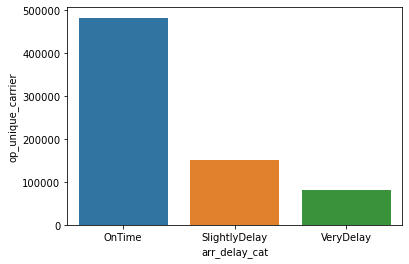

In [372]:
sns.barplot(x='arr_delay_cat',y='op_unique_carrier',data=df_arr_delay)

In [373]:
#new feature: is_delayed

result = []
for value in df['arr_delay']:
    if value > 0:
        result.append(1)
    elif value <= 0:
        result.append(0)

df['is_delayed'] = result  


In [374]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday', 'distance_cat', 'arr_delay_hr',
       'arr_delay_cat', 'is_delayed'],
      dtype='object')

In [375]:
df_delay=df.groupby('op_unique_carrier').agg({'flights':'count',
                                     'is_delayed':'sum'}).reset_index()



# .apply(lambda x: pd.Series({
#       'nb_flights': len(df['flights']),
#       'perc_delayed': round(np.average(df['is_delayed']), 4)
#   }))

In [376]:
df_delay

,op_unique_carrier,flights,is_delayed
0,9E,23190,7060
1,9K,220,43
2,AA,64447,20887
3,AS,22349,6278
4,AX,8171,3494
5,B6,30151,12381
6,C5,3881,1987
7,CP,9228,2673
8,DL,90875,23532
9,EM,462,126


In [377]:
df_delay['delay_percentage']=round(df_delay['is_delayed']/df_delay['flights'],2)

In [378]:
df_delay.sort_values('delay_percentage',ascending=False)

,op_unique_carrier,flights,is_delayed,delay_percentage
15,KS,165,100,0.61
6,C5,3881,1987,0.51
16,MQ,18020,8470,0.47
4,AX,8171,3494,0.43
5,B6,30151,12381,0.41
27,ZW,9473,3679,0.39
18,OH,27333,10551,0.39
11,F9,12084,4702,0.39
12,G4,8050,3099,0.38
26,YX,30632,11243,0.37


In [379]:
#add a pie chart here

### cluster airline by delay: 
* Which airline is more likely to delay?

In [380]:
df_SlightlyDelay=df[df['arr_delay_cat']=="SlightlyDelay"]
df_VeryDelay=df[df['arr_delay_cat']=="VeryDelay"]


In [381]:
#SlightlyDelay:0-30minutes late
#in each group: analyze the airline behavior

In [382]:
df_SlightlyDelay

,fl_date,mkt_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,Weather_destin,Visibility_origin,Visibility_destin,windspeed_origin,windspeed_destin,weekday,distance_cat,arr_delay_hr,arr_delay_cat,is_delayed
4,2018-01-01,NK,NK,MSP,"Minneapolis, MN",DTW,"Detroit, MI",1830,1912.0,42.0,...,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,"(337.0, 595.0]",0.25,SlightlyDelay,1
7,2018-01-01,DL,DL,MSP,"Minneapolis, MN",DTW,"Detroit, MI",845,904.0,19.0,...,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,"(337.0, 595.0]",0.12,SlightlyDelay,1
10,2018-01-01,DL,G7,IND,"Indianapolis, IN",DTW,"Detroit, MI",1016,1015.0,-1.0,...,lightrain,mediumvisbility,highvisibility,lowwindspeed,lowwindspeed,0,"(30.999, 337.0]",0.02,SlightlyDelay,1
13,2018-01-01,DL,YX,IND,"Indianapolis, IN",DTW,"Detroit, MI",615,613.0,-2.0,...,lightrain,mediumvisbility,highvisibility,lowwindspeed,lowwindspeed,0,"(30.999, 337.0]",0.27,SlightlyDelay,1
17,2018-01-01,NK,NK,RSW,"Fort Myers, FL",DTW,"Detroit, MI",1640,1631.0,-9.0,...,lightrain,highvisibility,highvisibility,lowwindspeed,lowwindspeed,0,"(1005.0, 4983.0]",0.07,SlightlyDelay,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715356,2019-01-31,HA,EM,HNL,"Honolulu, HI",MKK,"Hoolehua, HI",1444,1456.0,12.0,...,lightrain,highvisibility,highvisibility,highwindspeed,highwindspeed,3,"(30.999, 337.0]",0.32,SlightlyDelay,1
715359,2019-01-31,HA,EM,HNL,"Honolulu, HI",JHM,"Kapalua, HI",936,956.0,20.0,...,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,"(30.999, 337.0]",0.43,SlightlyDelay,1
715360,2019-01-31,HA,EM,HNL,"Honolulu, HI",JHM,"Kapalua, HI",1226,1214.0,-12.0,...,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,"(30.999, 337.0]",0.18,SlightlyDelay,1
715363,2019-01-31,HA,EM,HNL,"Honolulu, HI",LNY,"Lanai, HI",1101,1134.0,33.0,...,lightrain,highvisibility,highvisibility,highwindspeed,lowwindspeed,3,"(30.999, 337.0]",0.50,SlightlyDelay,1


In [426]:
df_arrline_dep_delay = pd.DataFrame({'arrline_dep_delay' : df.groupby([ 'op_unique_carrier'] )['dep_delay'].mean()}).reset_index()
df_arrline_arr_delay = pd.DataFrame({'arrline_arr_delay' : df.groupby([ 'op_unique_carrier'] )['arr_delay'].mean()}).reset_index()


In [430]:
df_airline=df_arrline_dep_delay.merge(df_arrline_arr_delay,on='op_unique_carrier')

In [427]:
df_dest_arr_delay = pd.DataFrame({'dest_arr_delay' : df.groupby([ 'dest'] )['arr_delay'].mean()}).reset_index()
df_origin_dep_delay = pd.DataFrame({'origin_dep_delay' : df.groupby([ 'origin'] )['dep_delay'].mean()}).reset_index()


In [433]:
df=df.merge(df_airline,on='op_unique_carrier')

In [435]:
df=df.merge(df_dest_arr_delay,on='dest')

In [436]:
df=df.merge(df_origin_dep_delay,on='origin')

In [437]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday', 'distance_cat', 'arr_delay_hr',
       'arr_delay_cat', 'is_delayed', 'DAY_OF_WEEK', 'arrline_dep_delay',
       'arrline_arr_delay', 'dest_arr_delay', 'origin_dep_delay'],
      dtype='object')

## delay by time

### a. categorize arr_delay by day of week:
* are flights tends to delay during the weekdays or weekends?

In [383]:
df['weekday'].unique()

array([0, 5, 6, 1, 2, 3, 4])

In [384]:
ind=df[df['weekday'].isin([1,2,3,4,0])].index
df.loc[ind,'DAY_OF_WEEK']="WeekDay"

In [385]:
ind=df[df['weekday'].isin([5,6])].index
df.loc[ind,'DAY_OF_WEEK']="WeekEnd"

In [386]:
dayofweek = df[['DAY_OF_WEEK',
                    'is_delayed']].groupby('DAY_OF_WEEK').sum().sort_values(by='is_delayed',ascending=False)


In [387]:
print('>> Delayed flights by dayofweek<<')
print(dayofweek)

>> Delayed flights by dayofweek<<
             is_delayed
DAY_OF_WEEK            
WeekDay          183068
WeekEnd           49860


In [388]:
dayofweek

,is_delayed
DAY_OF_WEEK,
WeekDay,183068
WeekEnd,49860


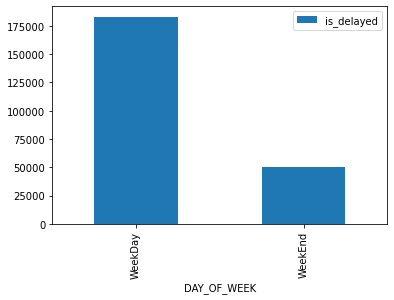

In [389]:
dayofweek.plot(kind='bar')

plt.legend()
plt.show()

### b. creating time block desination

In [390]:
def arr_time(x):
    if x>=700 and x<=1200:
        return "Morning"
    elif x>1200 and x<=1800:
        return "Afternoon"
    elif x>1800 and x<=2300:
        return "Evening"
    elif (x>2300 and x<=2400) or (x<700):
        return "RedEye"
    

In [442]:
df_timeblk=df.copy()
df_timeblk_dep=df.copy()

In [447]:
# We can create ARR_TIME_BLOCK.
df['arr_timeblk'] = df['arr_time'].apply(lambda x :arr_time(x))

In [448]:
# We can create DEP_TIME_BLOCK.
df['dep_timeblk'] = df['dep_time'].apply(lambda x :arr_time(x))

In [451]:
avg_arr_dely_timeblk=df[['arr_timeblk','arr_delay']].groupby('arr_timeblk').mean().sort_values(by='arr_delay',ascending=False)


In [453]:
df=df.merge(avg_arr_dely_timeblk,on='arr_timeblk')

In [454]:
avg_dep_dely_timeblk=df[['dep_timeblk','dep_delay']].groupby('dep_timeblk').mean().sort_values(by='dep_delay',ascending=False)


In [455]:
df=df.merge(avg_dep_dely_timeblk,on='dep_timeblk')

In [458]:
df.head()

,fl_date,mkt_carrier,op_unique_carrier,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay_x,...,is_delayed,DAY_OF_WEEK,arrline_dep_delay,arrline_arr_delay,dest_arr_delay,origin_dep_delay,arr_timeblk,dep_timeblk,arr_delay_y,dep_delay_y
0,2018-01-01 00:00:00,DL,9E,TVC,"Traverse City, MI",DTW,"Detroit, MI",615.0,611.0,-4.0,...,0.0,WeekDay,11.964899,4.390513,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
1,2018-01-13 00:00:00,DL,OO,TVC,"Traverse City, MI",DTW,"Detroit, MI",610.0,607.0,-3.0,...,1.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
2,2018-01-14 00:00:00,DL,OO,TVC,"Traverse City, MI",DTW,"Detroit, MI",610.0,603.0,-7.0,...,0.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
3,2018-01-15 00:00:00,DL,OO,TVC,"Traverse City, MI",DTW,"Detroit, MI",610.0,558.0,-12.0,...,0.0,WeekDay,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
4,2018-01-20 00:00:00,DL,OO,TVC,"Traverse City, MI",DTW,"Detroit, MI",610.0,609.0,-1.0,...,0.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697


In [460]:
df=df.rename(columns={'arr_delay_y':'avg_arr_delay_timeblk','dep_delay_y':'avg_dep_delay_timeblk',
                   'arr_delay_x':'arr_delay','dep_delay_x':'dep_delay'})

## Delay by city

In [394]:
df_dest = df[['dest',
              'is_delayed']].groupby('dest').sum().sort_values(by='is_delayed',ascending=False).reset_index()
df_dest['percentage'] = df_dest['is_delayed']/(df_dest['is_delayed'].sum())


In [395]:
df_dest.head()

,dest,is_delayed,percentage
0,ORD,14105,0.060555
1,ATL,10358,0.044469
2,CLT,7897,0.033903
3,DEN,7590,0.032585
4,LGA,7428,0.031890


In [396]:
df_origin = df[['origin','dep_delay']].groupby('origin').sum().sort_values(by='dep_delay',ascending=False)
df_origin['percentage'] = df_origin['dep_delay']/(df_origin['dep_delay'].sum())*100
df_origin.head()

,dep_delay,percentage
origin,,
ORD,663286.0,9.948226
ATL,333271.0,4.998530
LGA,281670.0,4.224598
DTW,266628.0,3.998992
DEN,250546.0,3.757788


In [397]:
#finding: some of the destination airport having the largest delay are
#also the origin airportb

In [461]:
df.columns

Index(['fl_date', 'mkt_carrier', 'op_unique_carrier', 'origin',
       'origin_city_name', 'dest', 'dest_city_name', 'crs_dep_time',
       'dep_time', 'dep_delay', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time',
       'air_time', 'flights', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'weekday', 'distance_cat', 'arr_delay_hr',
       'arr_delay_cat', 'is_delayed', 'DAY_OF_WEEK', 'arrline_dep_delay',
       'arrline_arr_delay', 'dest_arr_delay', 'origin_dep_delay',
       'arr_timeblk', 'dep_timeblk', 'avg_arr_delay_timeblk',
       'avg_dep_delay_timeblk'],
      dtype='object')

In [462]:
cols_to_drop=['fl_date', 'mkt_carrier','origin_city_name','dest_city_name',
              'dep_time', 'dep_delay', 'arr_time','crs_dep_time',
       'cancelled', 'diverted','air_time','actual_elapsed_time', 'flights','arr_delay_cat','weekday']

In [463]:
df_final=df.drop(cols_to_drop,axis=1)

In [464]:
df_var=df_final.drop('arr_delay',axis=1)

In [465]:
df_target=df['arr_delay']

In [466]:
df_var.columns


Index(['op_unique_carrier', 'origin', 'dest', 'crs_arr_time',
       'crs_elapsed_time', 'distance', 'Weather_origin', 'Weather_destin',
       'Visibility_origin', 'Visibility_destin', 'windspeed_origin',
       'windspeed_destin', 'distance_cat', 'arr_delay_hr', 'is_delayed',
       'DAY_OF_WEEK', 'arrline_dep_delay', 'arrline_arr_delay',
       'dest_arr_delay', 'origin_dep_delay', 'arr_timeblk', 'dep_timeblk',
       'avg_arr_delay_timeblk', 'avg_dep_delay_timeblk'],
      dtype='object')

In [467]:
df_final.loc['distance_cat']=df_final['distance_cat'].astype("object",copy=False)

In [468]:
df_final.dtypes

op_unique_carrier         object
origin                    object
dest                      object
crs_arr_time             float64
arr_delay                float64
crs_elapsed_time         float64
distance                 float64
Weather_origin            object
Weather_destin            object
Visibility_origin         object
Visibility_destin         object
windspeed_origin          object
windspeed_destin          object
distance_cat              object
arr_delay_hr             float64
is_delayed               float64
DAY_OF_WEEK               object
arrline_dep_delay        float64
arrline_arr_delay        float64
dest_arr_delay           float64
origin_dep_delay         float64
arr_timeblk               object
dep_timeblk               object
avg_arr_delay_timeblk    float64
avg_dep_delay_timeblk    float64
dtype: object

In [473]:
df_final

,op_unique_carrier,origin,dest,crs_arr_time,arr_delay,crs_elapsed_time,distance,Weather_origin,Weather_destin,Visibility_origin,...,is_delayed,DAY_OF_WEEK,arrline_dep_delay,arrline_arr_delay,dest_arr_delay,origin_dep_delay,arr_timeblk,dep_timeblk,avg_arr_delay_timeblk,avg_dep_delay_timeblk
0,9E,TVC,DTW,738.0,-17.0,83.0,207.0,lightrain,lightrain,lowvisibility,...,0.0,WeekDay,11.964899,4.390513,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
1,OO,TVC,DTW,732.0,1.0,82.0,207.0,lightrain,cloudy,lowvisibility,...,1.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
2,OO,TVC,DTW,730.0,-13.0,80.0,207.0,lightrain,lightrain,highvisibility,...,0.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
3,OO,TVC,DTW,730.0,-9.0,80.0,207.0,lightrain,lightrain,lowvisibility,...,0.0,WeekDay,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
4,OO,TVC,DTW,732.0,-21.0,82.0,207.0,cloudy,cloudy,highvisibility,...,0.0,WeekEnd,15.045913,10.703589,6.067615,20.780556,Morning,RedEye,-3.38967,4.191697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715367,AS,LIH,OAK,2359.0,-7.0,304.0,2457.0,clear,clear,highvisibility,...,0.0,WeekDay,-0.969753,-4.464361,-5.089118,2.016949,RedEye,Afternoon,18.66000,10.162826
715368,AS,LIH,OAK,2359.0,-28.0,304.0,2457.0,lightrain,cloudy,highvisibility,...,0.0,WeekEnd,-0.969753,-4.464361,-5.089118,2.016949,RedEye,Afternoon,18.66000,10.162826
715369,AS,LIH,OAK,2359.0,-15.0,304.0,2457.0,clear,lightrain,highvisibility,...,0.0,WeekDay,-0.969753,-4.464361,-5.089118,2.016949,RedEye,Afternoon,18.66000,10.162826
715370,AS,LIH,OAK,2359.0,-9.0,304.0,2457.0,lightrain,heavyrain,highvisibility,...,0.0,WeekDay,-0.969753,-4.464361,-5.089118,2.016949,RedEye,Afternoon,18.66000,10.162826


In [469]:
df_final.drop(['distance_cat','arr_delay_hr'],axis=1,inplace=True)

In [472]:
df_final.to_csv('df_finalversion_data_final.csv')

# Data Preprocessing

# Modeling

# Evaluation